In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [3]:
score = np.load("score.npy")
label = np.load("label.npy")
print(score.shape,label.shape)

(1043, 2166) (1043, 2166)


In [8]:
score = score.reshape(-1)
label = label.reshape(-1)
print(score.shape,label.shape)
print(score[0:10],label[0:10])

(2259138,) (2259138,)
[0.19176412 0.18485823 0.18338434 0.20127724 0.18132506 0.1896766
 0.19484077 0.1763805  0.17862634 0.18079148] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
mt.roc_auc_score(label,score)

0.860704369767366

In [4]:
scores = []
for i in range(1,11):
    tscore = np.load("Prediction/MMnimc/0323cv{}.npy".format(i))
    scores.append(tscore)

score = np.stack(scores,0)
print(score.shape)

(10, 1043, 2166)


In [5]:
score = np.average(score,0).reshape(-1)
score.shape

(2259138,)

In [6]:
label = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/m-d.csv",delimiter=',',header=None).values.reshape(-1)
label.shape

(2259138,)

0.8989606350699547


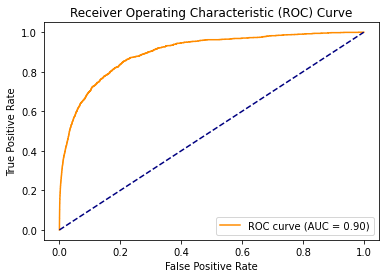

In [8]:
fpr, tpr, _ = mt.roc_curve(label, score)

# 计算 AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
# 绘制 ROC 曲线
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

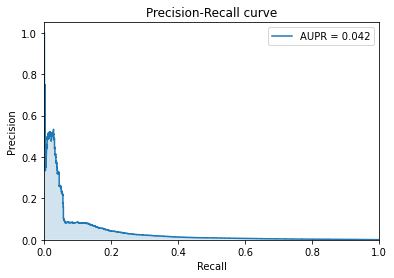

In [13]:
precision, recall, thresholds = mt.precision_recall_curve(label, score)
aupr = auc(recall, precision)
plt.plot(recall, precision, label='AUPR = %.3f' % aupr)
plt.fill_between(recall, precision, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='upper right')
plt.show()